# DA Final project:

# Group 3  

# social anxiety

###  Name of students:
Neta Aharoni  
Daniel Cohen  
Maoz Goldberg  




<a id='top'></a>

<div>
<img src="https://storage.googleapis.com/kaggle-datasets-images/6931996/11117207/9c78b2064b2d4550b0283ae48872bf79/dataset-cover.jpg?t=2025-03-21-13-36-33"/>
</div>


In [3]:
!pip install geopandas
!pip install folium
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import requests
from IPython.display import Image
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px

### Information on the data
The target of our project is to minimize the frequency of social anxiety.
<br>taken from:  https://www.kaggle.com/datasets/natezhang123/social-anxiety-dataset



In [5]:
df = pd.read_csv("enhanced_anxiety.csv")
df

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,23,Female,Engineer,6.1,3.1,566,9,Yes,No,8,91,28,1,Yes,Yes,1,No,3,6.0
10996,50,Other,Teacher,6.6,3.6,64,17,Yes,No,7,95,17,3,No,No,2,No,7,3.0
10997,29,Male,Nurse,6.7,6.9,159,14,No,No,8,72,16,1,Yes,Yes,2,Yes,7,4.0
10998,53,Other,Artist,5.7,2.7,248,8,No,No,4,112,28,3,Yes,Yes,1,Yes,2,4.0


In [6]:
df.shape

(11000, 19)

In [7]:
df.columns

Index(['Age', 'Gender', 'Occupation', 'Sleep Hours',
       'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)',
       'Alcohol Consumption (drinks/week)', 'Smoking',
       'Family History of Anxiety', 'Stress Level (1-10)', 'Heart Rate (bpm)',
       'Breathing Rate (breaths/min)', 'Sweating Level (1-5)', 'Dizziness',
       'Medication', 'Therapy Sessions (per month)', 'Recent Major Life Event',
       'Diet Quality (1-10)', 'Anxiety Level (1-10)'],
      dtype='object')

### 1. Wrangling data

In [9]:
df.isnull().sum()

Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm)                     0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Anxiety Level (1-10)                 0
dtype: int64

## המרת עמודות טקסטואליות לערכים בינאריים



In [11]:
df1 = df.copy()
binary_cols = [
    'Smoking',
    'Family History of Anxiety',
    'Dizziness',
    'Medication',
    'Recent Major Life Event']
for col in binary_cols:
    df1[col] = df1[col].map({'Yes': 1, 'No': 0})
df.dtypes

Age                                    int64
Gender                                object
Occupation                            object
Sleep Hours                          float64
Physical Activity (hrs/week)         float64
Caffeine Intake (mg/day)               int64
Alcohol Consumption (drinks/week)      int64
Smoking                               object
Family History of Anxiety             object
Stress Level (1-10)                    int64
Heart Rate (bpm)                       int64
Breathing Rate (breaths/min)           int64
Sweating Level (1-5)                   int64
Dizziness                             object
Medication                            object
Therapy Sessions (per month)           int64
Recent Major Life Event               object
Diet Quality (1-10)                    int64
Anxiety Level (1-10)                 float64
dtype: object

In [12]:
df1

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,1,0,10,114,14,4,0,1,3,1,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,1,1,1,62,23,2,1,0,2,0,8,3.0
2,64,Male,Other,5.0,3.7,117,4,0,1,1,91,28,3,0,0,1,1,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,1,0,4,86,17,3,0,0,0,0,1,2.0
4,49,Female,Other,8.2,2.3,247,4,1,0,1,98,19,4,1,1,1,0,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,23,Female,Engineer,6.1,3.1,566,9,1,0,8,91,28,1,1,1,1,0,3,6.0
10996,50,Other,Teacher,6.6,3.6,64,17,1,0,7,95,17,3,0,0,2,0,7,3.0
10997,29,Male,Nurse,6.7,6.9,159,14,0,0,8,72,16,1,1,1,2,1,7,4.0
10998,53,Other,Artist,5.7,2.7,248,8,0,0,4,112,28,3,1,1,1,1,2,4.0


In [13]:
df.isnull().sum()

Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm)                     0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Anxiety Level (1-10)                 0
dtype: int64

### Noisy data
#### Checking that these variables are within a reasonable range with Boxplot

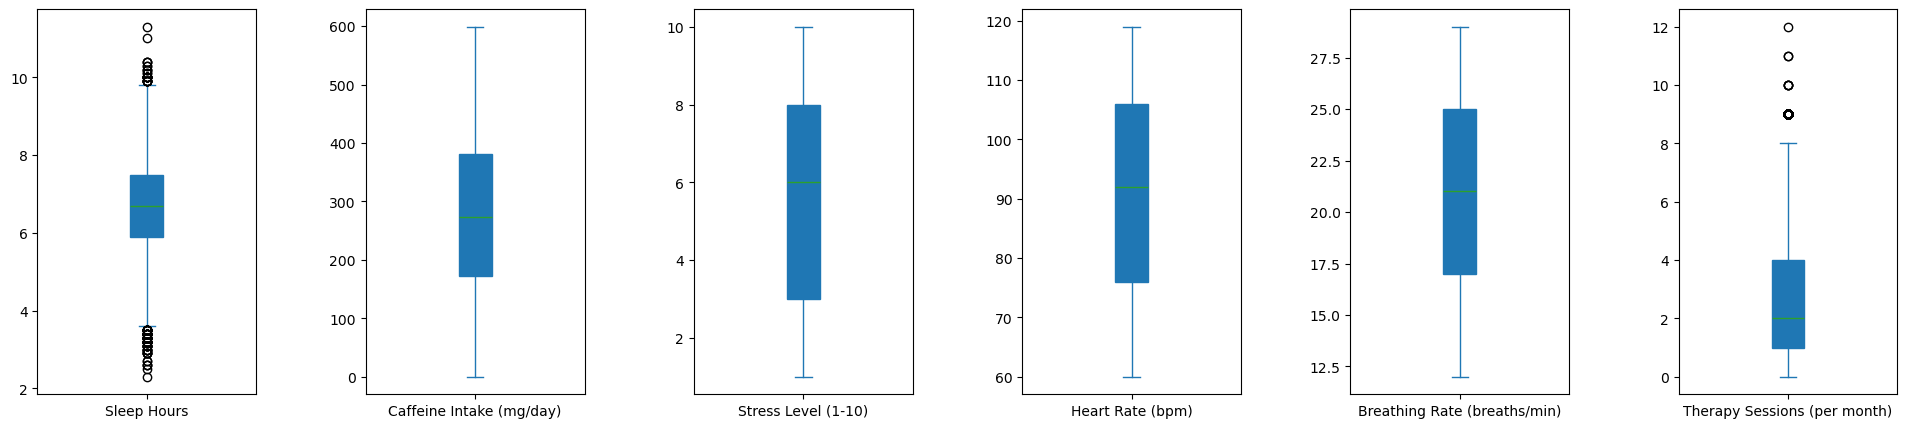

In [15]:
columns_of_interest = [
    'Sleep Hours',
    'Caffeine Intake (mg/day)',
    'Stress Level (1-10)',
    'Heart Rate (bpm)',
    'Breathing Rate (breaths/min)',
    'Therapy Sessions (per month)']
df[columns_of_interest].plot(
    subplots=True,
    layout=(1, len(columns_of_interest)),
    kind='box',
    figsize=(24, 5),
    patch_artist=True)
plt.subplots_adjust(wspace=0.5) 
plt.show()

In [16]:
correlation_matrix = df1.corr(numeric_only = True, method = 'spearman' ).round(2)
correlation_matrix

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
Age,1.00,-0.18,0.04,-0.04,-0.02,-0.02,-0.02,-0.04,-0.03,-0.01,-0.02,-0.03,-0.00,-0.07,-0.01,0.05,-0.03
Sleep Hours,-0.18,1.00,0.16,-0.18,-0.06,-0.06,-0.07,-0.15,-0.12,-0.10,-0.10,-0.08,-0.03,-0.20,-0.06,0.13,-0.35
Physical Activity (hrs/week),0.04,0.16,1.00,-0.12,-0.04,-0.04,-0.05,-0.11,-0.08,-0.07,-0.08,-0.04,-0.02,-0.16,-0.03,0.09,-0.18
Caffeine Intake (mg/day),-0.04,-0.18,-0.12,1.00,0.04,0.03,0.07,0.12,0.08,0.08,0.07,0.03,0.02,0.17,0.04,-0.09,0.28
Alcohol Consumption (drinks/week),-0.02,-0.06,-0.04,0.04,1.00,0.00,0.02,0.05,0.04,0.02,0.02,0.03,0.00,0.04,0.01,-0.03,0.07
Smoking,-0.02,-0.06,-0.04,0.03,0.00,1.00,0.00,0.03,0.02,0.04,0.02,0.00,0.02,0.04,0.02,-0.02,0.06
Family History of Anxiety,-0.02,-0.07,-0.05,0.07,0.02,0.00,1.00,0.06,0.04,0.04,0.02,0.01,0.01,0.58,0.01,-0.06,0.17
Stress Level (1-10),-0.04,-0.15,-0.11,0.12,0.05,0.03,0.06,1.00,0.09,0.06,0.09,0.05,0.02,0.16,0.04,-0.11,0.72
Heart Rate (bpm),-0.03,-0.12,-0.08,0.08,0.04,0.02,0.04,0.09,1.00,0.05,0.06,0.04,0.00,0.12,0.03,-0.09,0.13
Breathing Rate (breaths/min),-0.01,-0.10,-0.07,0.08,0.02,0.04,0.04,0.06,0.05,1.00,0.05,0.01,0.02,0.10,0.02,-0.05,0.10


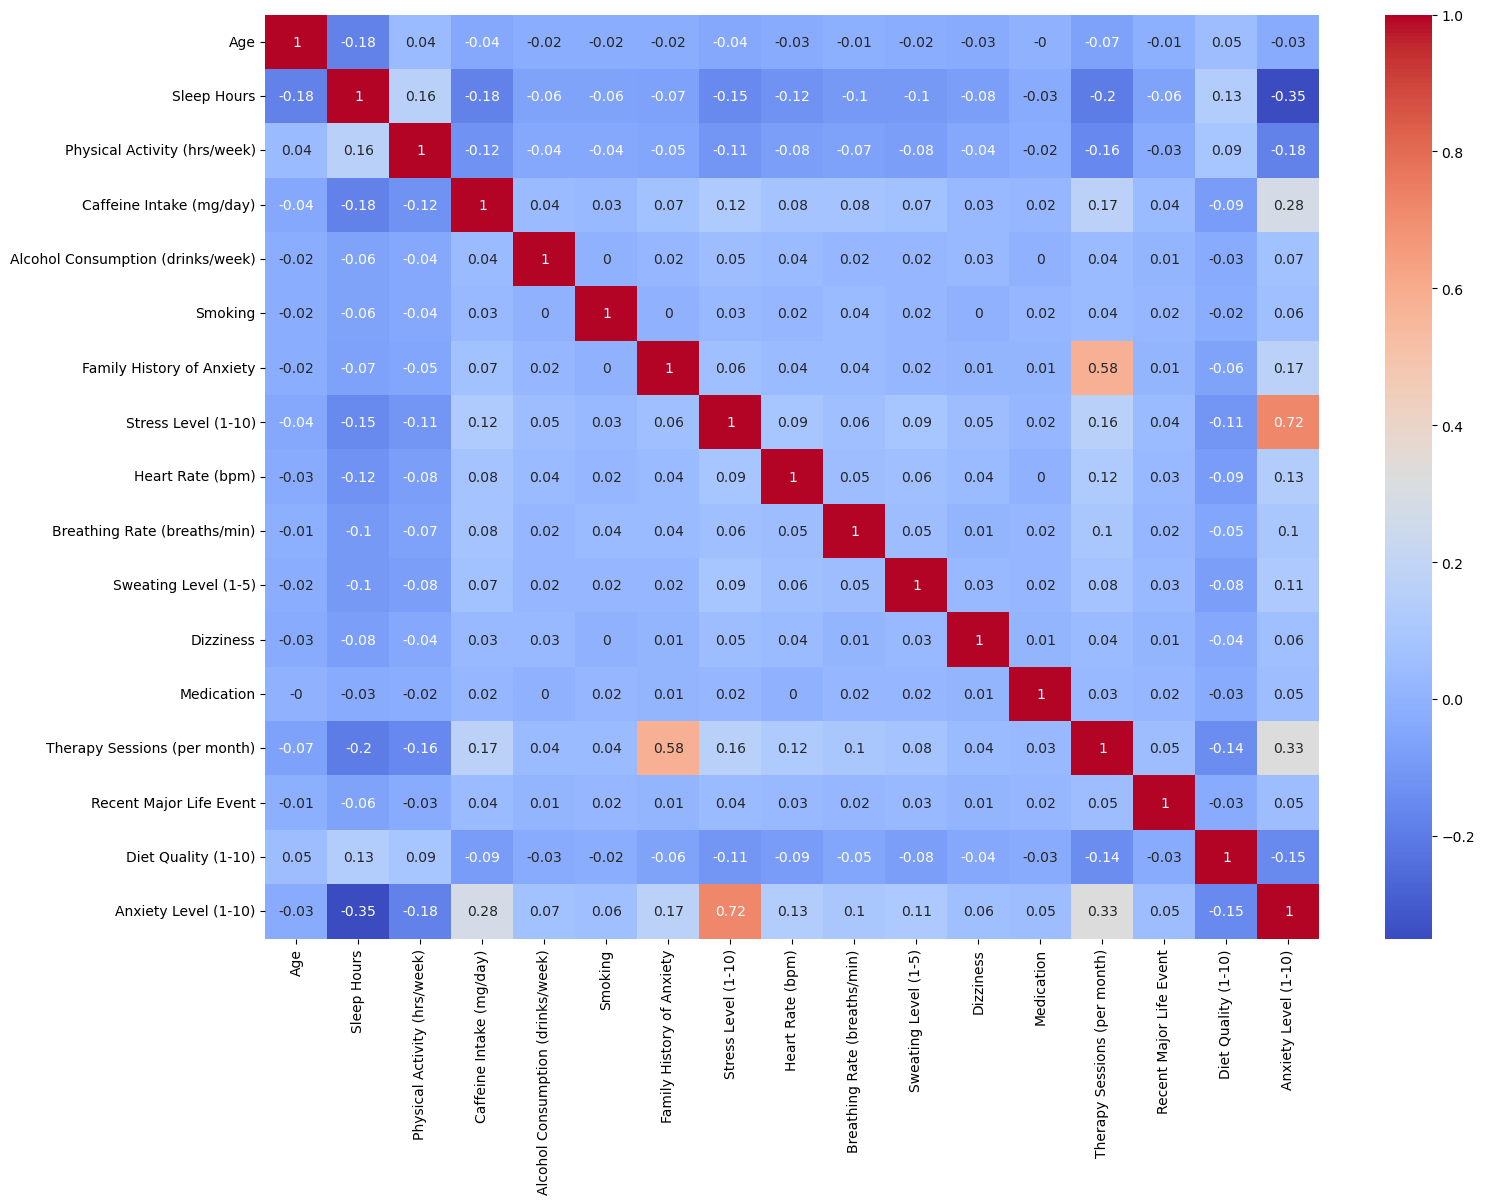

In [17]:
plt.figure(figsize=(17,12))
sns.heatmap(data=correlation_matrix,cmap='coolwarm', annot=True)
plt.show()

<div dir="rtl">
    
# ספטומים שמעידים על חרדה
<div dir="rtl">

<div dir="rtl">
בהתחלה רצינו לראות אם לאנשים חרדתים יש סמפטומים שונים המעידים על כך.
הסמפטום הראשון שנגע בו הוא הדופק ולכן התחלנו בפיצול עמודת הדופק ל3 רמות שונות ולנסות לראות אם הדופק הוא אכן סמטום של חרדה.
<ul dir="rtl">

In [20]:
bins = [60, 80, 100, 120, 160]
labels = ['60-80', '80-100', '100-120', '120-160']
df1['Heart Rate (bpm) Group'] = pd.cut(df1['Heart Rate (bpm)'], bins=bins, labels=labels, right=True)
df1['HR_Code'] = df1['Heart Rate (bpm) Group'].astype('category').cat.codes
group_counts = df1['Heart Rate (bpm) Group'].value_counts().sort_index()
group_counts

Heart Rate (bpm) Group
60-80      3354
80-100     3652
100-120    3837
120-160       0
Name: count, dtype: int64

In [21]:
df[['Heart Rate (bpm)', 'Anxiety Level (1-10)']].corr()

,Heart Rate (bpm),Anxiety Level (1-10)
Heart Rate (bpm),1.0000,0.1889
Anxiety Level (1-10),0.1889,1.0000


In [22]:
df.groupby( 'Anxiety Level (1-10)')['Heart Rate (bpm)'].mean()

Anxiety Level (1-10)
1.0      89.358999
2.0      89.257403
3.0      89.838803
4.0      89.925911
5.0      88.868631
6.0      89.889610
7.0      87.471545
8.0     104.677686
9.0     104.410334
10.0    104.801242
Name: Heart Rate (bpm), dtype: float64

<ul dir="rtl">
לאחר שעשינו ממוצע דופק בכל רמת חרדה ניתן לראות באופן כללי שכשאר רמת החרדה גבוה יותר כך ממוצע הדופק גבוה יותר.
<ul>

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7872\3260692506.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Anxiety Group', y='Heart Rate (bpm)', palette='coolwarm', order=order)


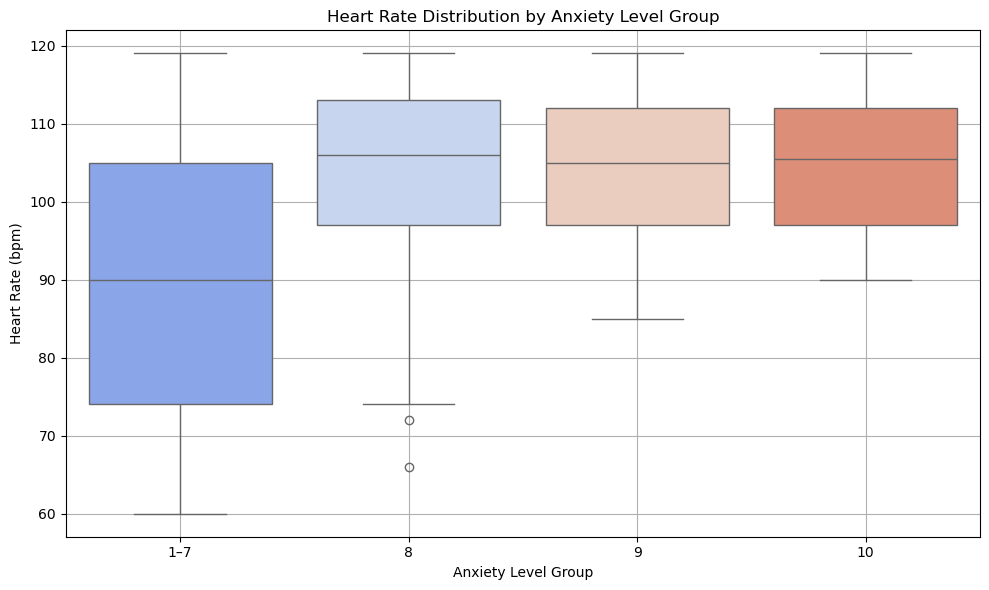

In [24]:
def group_anxiety(x):
    return '1–7' if x <= 7 else str(int(x))
df['Anxiety Group'] = df['Anxiety Level (1-10)'].apply(group_anxiety)
order = ['1–7', '8', '9', '10']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Anxiety Group', y='Heart Rate (bpm)', palette='coolwarm', order=order)
plt.title('Heart Rate Distribution by Anxiety Level Group')
plt.xlabel('Anxiety Level Group')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)
plt.tight_layout()
plt.show()

<div dir="rtl">

### תת מסקנה ראשונית:
<ul dir="rtl">
 אחרי מה שהצגנו עד כה ניתן לראות שהכן בין דופק גבוה הוא סימפטום לחרדה והם קשורים אחד בשני.
<ul>
</div>

<div dir="rtl">
 לאחד שהוכחנו את הסימפטום הראשון שקיים קשר בינו לבין חרדה נבדוק את הסימפטום הבא שהוא נשימה.
    לשם כך נתמקד עכשיו בעמודת הנשימה ונפל גם אותה לקבוצות.
<ul dir="rtl">

In [27]:
df[['Breathing Rate (breaths/min)', 'Anxiety Level (1-10)']].corr()

,Breathing Rate (breaths/min),Anxiety Level (1-10)
Breathing Rate (breaths/min),1.000000,0.157048
Anxiety Level (1-10),0.157048,1.000000


In [28]:
def classify_breathing(rate):
    if 12 <= rate <= 20:
        return 'Normal'
    else:
        return 'Abnormal'
df['Breathing Rate Group'] = df['Breathing Rate (breaths/min)'].apply(classify_breathing)
df[['Breathing Rate (breaths/min)', 'Breathing Rate Group']]
df['Breathing_Group'] = pd.cut(
    df['Breathing Rate (breaths/min)'],
    bins=[-float('inf'), 12, 20, float('inf')],
    labels=['Below 12', '12-20 (Normal)', 'Above 20'])

group_counts = df['Breathing_Group'].value_counts().sort_index()
group_counts

Breathing_Group
Below 12           571
12-20 (Normal)    4413
Above 20          6016
Name: count, dtype: int64

In [29]:
# df['Breathing_Group'] = pd.cut(
#     df['Breathing Rate (breaths/min)'],
#     bins=[-float('inf'), 12, 20, float('inf')],
#     labels=['Below 12', '12-20 (Normal)', 'Above 20'])

# group_counts = df['Breathing_Group'].value_counts().sort_index()
# group_counts

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7872\2849592689.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Breathing_Group', y='Anxiety Level (1-10)', palette='coolwarm')


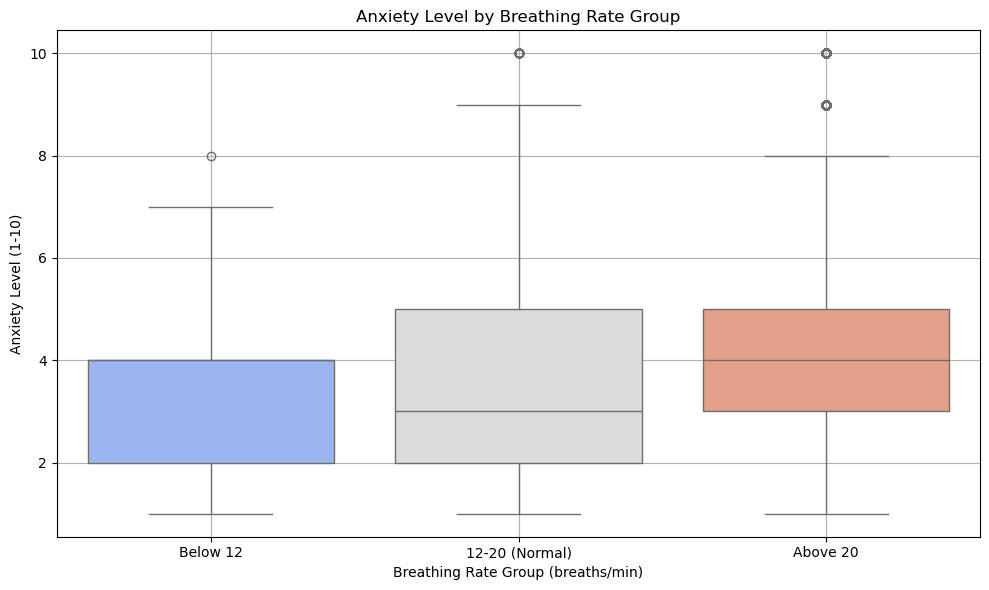

In [30]:
bins = [0, 12, 20, 60]
labels = ['Below 12', '12-20 (Normal)', 'Above 20']
df['Breathing_Group'] = pd.cut(df['Breathing Rate (breaths/min)'], bins=bins, labels=labels, right=True)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Breathing_Group', y='Anxiety Level (1-10)', palette='coolwarm')
plt.title('Anxiety Level by Breathing Rate Group')
plt.xlabel('Breathing Rate Group (breaths/min)')
plt.ylabel('Anxiety Level (1-10)')
plt.grid(True)
plt.tight_layout()
plt.show()

<ul
תת מסקנה שני:
ניתן לראות שיש גם קשר בין קצב נשימה גבוה לרמת חרדה.

<ul dir="rtl">
לאחר חקר קצר של הנשימה אנו לא רואים משהו מספיק שנוכל להגיד בוודאות שנשימה היא סימפטום נוסף. לשם כך ננסה לשלב בשלב הבא את הדופק יחד עם הנשימה ונראה אם נוכל להגיע למסקנה חזקה יותר.
<ul>

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7872\3473760726.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


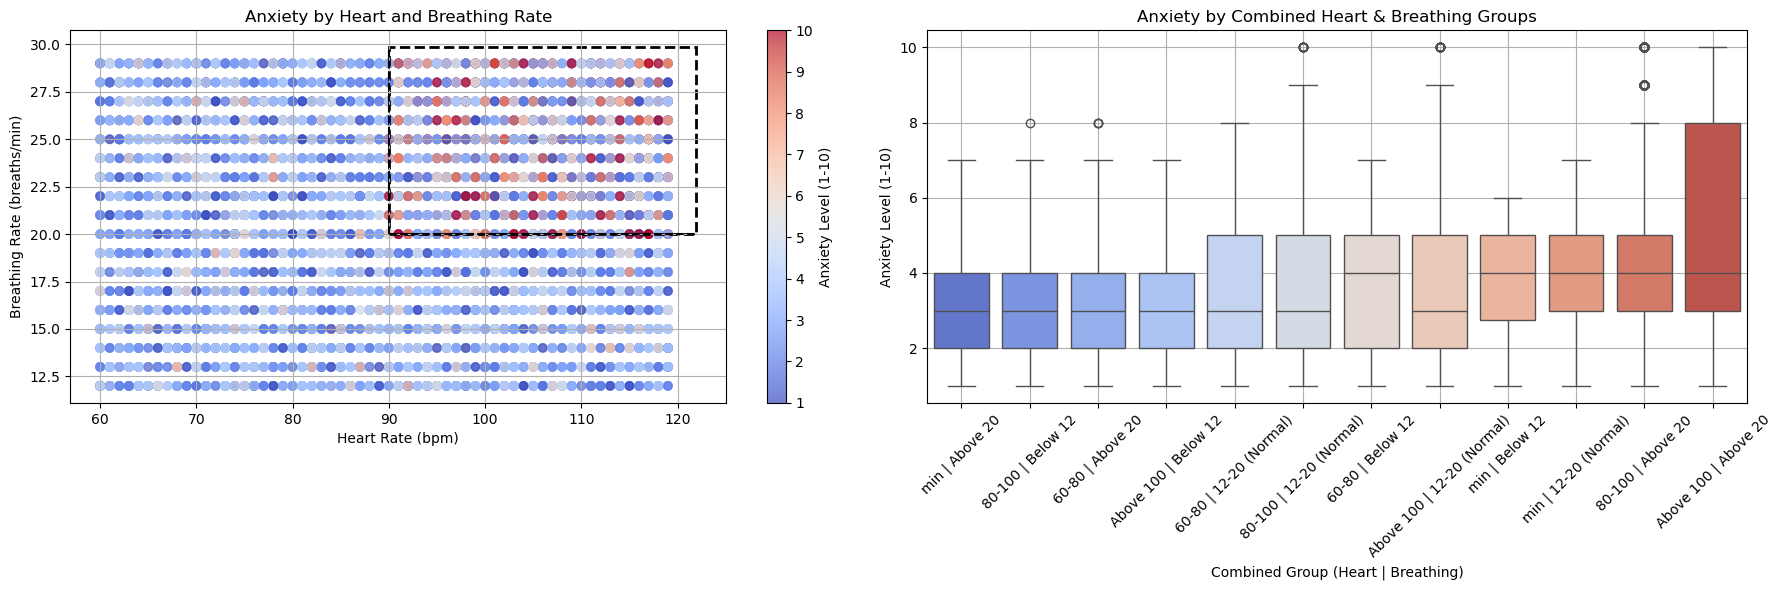

In [33]:
import matplotlib.patches as patches
df['Heart_Group'] = pd.cut(
    df['Heart Rate (bpm)'],
    bins=[-float('inf'), 60, 80, 100, float('inf')],
    labels=['min', '60-80', '80-100', 'Above 100'])
df['Breathing_Group'] = pd.cut(
    df['Breathing Rate (breaths/min)'],
    bins=[-float('inf'), 12, 20, float('inf')],
    labels=['Below 12', '12-20 (Normal)', 'Above 20'])
df['Combined_Group'] = df['Heart_Group'].astype(str) + ' | ' + df['Breathing_Group'].astype(str)
group_means = df.groupby('Combined_Group', observed=False)['Anxiety Level (1-10)'].mean().sort_values()
df['Combined_Group'] = pd.Categorical(
    df['Combined_Group'], 
    categories=group_means.index.tolist(), 
    ordered=True)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
scatter = axes[0].scatter(
    df['Heart Rate (bpm)'],
    df['Breathing Rate (breaths/min)'],
    c=df['Anxiety Level (1-10)'],
    cmap='coolwarm',
    alpha=0.7)
axes[0].set_xlabel('Heart Rate (bpm)')
axes[0].set_ylabel('Breathing Rate (breaths/min)')
axes[0].set_title('Anxiety by Heart and Breathing Rate')
axes[0].grid(True)
cbar = fig.colorbar(scatter, ax=axes[0])
cbar.set_label('Anxiety Level (1-10)')
x_min, x_max = axes[0].get_xlim()
y_min, y_max = axes[0].get_ylim()
axes[0].plot([90, 90], [20, y_max], color='black', linestyle='--', linewidth=1.5)
axes[0].plot([90, x_max], [20, 20], color='black', linestyle='--', linewidth=1.5)
highlight = patches.Rectangle(
    (90, 20),                  
    width=x_max - 90,           
    height=y_max - 20,         
    linewidth=2,
    edgecolor='black',
    facecolor='none',
    linestyle='--')
axes[0].add_patch(highlight)
sns.boxplot(
    data=df,
    x='Combined_Group',
    y='Anxiety Level (1-10)',
    palette='coolwarm',
    ax=axes[1])
axes[1].set_title('Anxiety by Combined Heart & Breathing Groups')
axes[1].set_xlabel('Combined Group (Heart | Breathing)')
axes[1].set_ylabel('Anxiety Level (1-10)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)
plt.tight_layout()
plt.show()

<div dir="rtl">

### **תת־מסקנה נוסף:**
<ul dir="rtl">
אם נאחד את הנתונים של הדופק והנשימה ביחס לחרדה נראה שכאשר יש דופק ונשימה מואצים,
החרדה גבוהה בהתאמה. אבל כאשר רק אחד מהם גבוה לא בהכרח יש חרדה ברמה גבוהה.
<ul>
</div>

<ul dir="rtl">
לאחר שהראנו שיש קשר בין שתי הסימפטום הראשונים לבין רמת חרדה נרצה לבדוק האם גם רמת זיעה מעידה על רמת חרדה ואפשר להציג אותו כסימפטום נוסף לחרדה.
<ul>

In [36]:
group_count = df['Sweating Level (1-5)'].value_counts().sort_index()
group_count

Sweating Level (1-5)
1    1978
2    2092
3    2323
4    2279
5    2328
Name: count, dtype: int64

In [37]:
df[['Sweating Level (1-5)', 'Anxiety Level (1-10)']].corr()

,Sweating Level (1-5),Anxiety Level (1-10)
Sweating Level (1-5),1.000000,0.160074
Anxiety Level (1-10),0.160074,1.000000


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7872\3657488345.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sweating Level (1-5)', y='Anxiety Level (1-10)', palette='coolwarm')


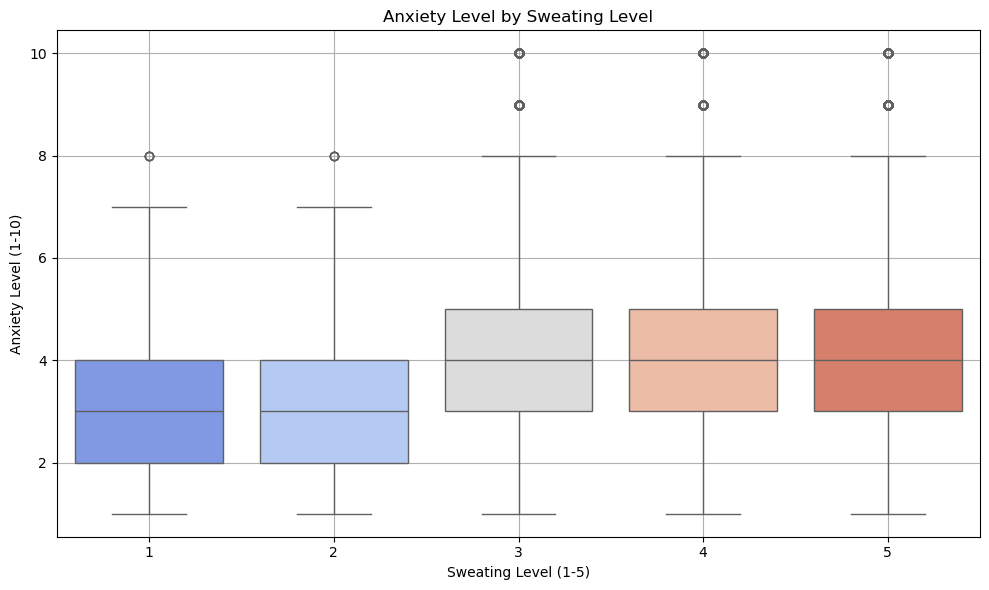

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sweating Level (1-5)', y='Anxiety Level (1-10)', palette='coolwarm')
plt.title('Anxiety Level by Sweating Level')
plt.xlabel('Sweating Level (1-5)')
plt.ylabel('Anxiety Level (1-10)')
plt.grid(True)
plt.tight_layout()
plt.show()

<div dir="rtl">

### **תת־מסקנה נוספת:**
<ul dir="rtl">
אנו רואים שרמות שונות של זיעה כן יכולות להיות סימפטום לחרדה אך נרצה לבדוק זאת בצורה יותר חזקה שנוכל להגיע שהיא סימפטום בצורה מוחלטת.
<div dir="rtl">
  לשם כך ניקח את שלושת הסימפטום ונרצה לבדוק האם יש קשר בכולם והאם אדם שיש לו את שלושתם נוכל להגיד באופן חד משמעי שיש לו חרדה.
</div>

<div dir="rtl">
 לשם כך ...
<ul dir="rtl">

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7872\2629637033.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


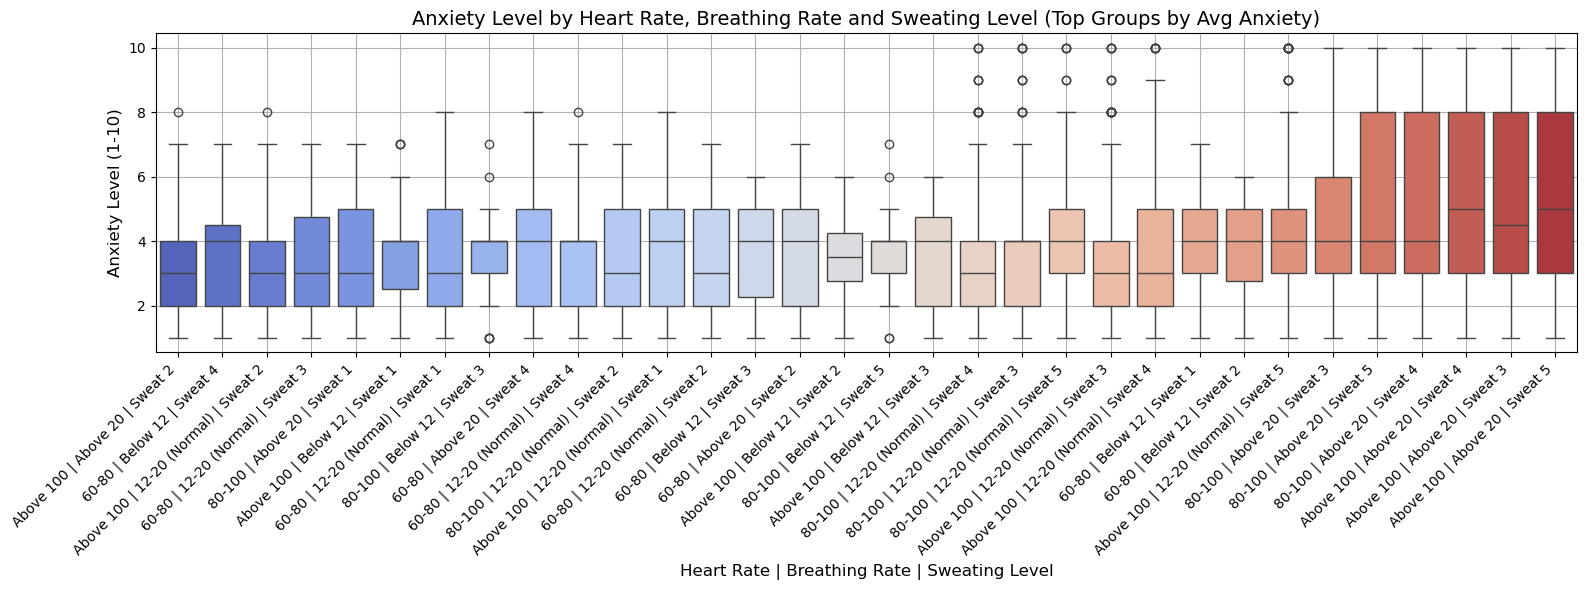

In [41]:
df['HR_Group'] = pd.cut(
    df['Heart Rate (bpm)'],
    bins=[-float('inf'), 60, 80, 100, float('inf')],
    labels=['min', '60-80', '80-100', 'Above 100'])
df['Breathing_Group'] = pd.cut(
    df['Breathing Rate (breaths/min)'],
    bins=[-float('inf'), 12, 20, float('inf')],
    labels=['Below 12', '12-20 (Normal)', 'Above 20'])
df_filtered = df.dropna(subset=['HR_Group', 'Breathing_Group', 'Sweating Level (1-5)'])
df_filtered = df_filtered[df_filtered['HR_Group'] != 'min']
df_filtered['Combined_3'] = (
    df_filtered['HR_Group'].astype(str) + ' | ' +
    df_filtered['Breathing_Group'].astype(str) + ' | Sweat ' +
    df_filtered['Sweating Level (1-5)'].astype(str))
group_means = df_filtered.groupby('Combined_3')['Anxiety Level (1-10)'].mean().sort_values()
filtered_categories = group_means.index[13:]  
df_filtered = df_filtered[df_filtered['Combined_3'].isin(filtered_categories)]
df_filtered['Combined_3'] = pd.Categorical(
    df_filtered['Combined_3'],
    categories=filtered_categories,
    ordered=True)
plt.figure(figsize=(16, 6))
sns.boxplot(
    data=df_filtered,
    x='Combined_3',
    y='Anxiety Level (1-10)',
    palette='coolwarm')
plt.title('Anxiety Level by Heart Rate, Breathing Rate and Sweating Level (Top Groups by Avg Anxiety)', fontsize=14)
plt.xlabel('Heart Rate | Breathing Rate | Sweating Level', fontsize=12)
plt.ylabel('Anxiety Level (1-10)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

<div dir="rtl">

### **מסקנה:**
 <li>רק כאשר לאדם יש את שלושת הסימפטומים שציינו נוכל לקבוע שהוא חרד.</li>

<h3 dir="rtl">הרחבה:</h3>
<ul dir="rtl">
  <li>כאשר אדם סובל בו־זמנית מהזעת יתר, דופק גבוה ונשימות מהירות ניתן לקשר זאת באופן מובהק לרמות חרדה גבוהות.</li>
  <li>כאשר מופיע רק אחד מהסימפטומים (למשל דופק גבוה בלבד) לא ניתן לקבוע בוודאות שזה נובע מחרדה, מאחר והסימפטום עשוי לנבוע גם מסיבות אחרות (כמו פעילות גופנית, מחלה פיזית וכו').</li>
</ul>

</div>

<div dir="rtl" style="text-align: right; border: 1px solid #ccc; padding: 15px; background-color: #f0f0f0; border-radius: 8px;">

#  הקשר בין צריכת קפאין, שעות שינה, וחרדה

</div>

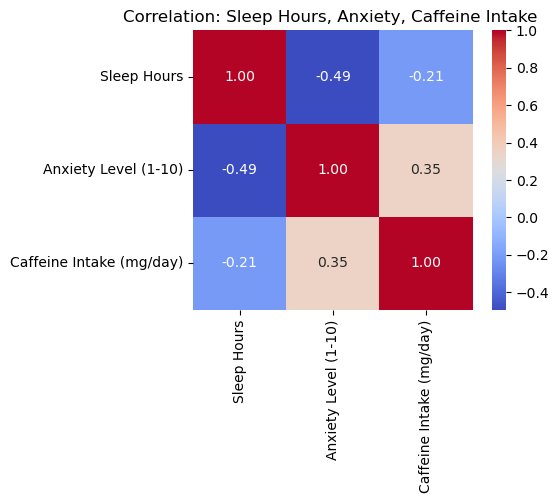

In [44]:
binary_mappings = {"Yes": 1, "No": 0}
binary_columns = [
    "Smoking", "Family History of Anxiety", "Dizziness",
    "Medication", "Recent Major Life Event"]
for col in binary_columns:
    df[col] = df[col].map(binary_mappings)
numeric_df = df.select_dtypes(include=["number"])
correlation_matrix = numeric_df.corr()
selected_cols = ["Sleep Hours", "Anxiety Level (1-10)", "Caffeine Intake (mg/day)"]
correlation_df = numeric_df[selected_cols]
correlation_matrix = correlation_df.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation: Sleep Hours, Anxiety, Caffeine Intake ")
plt.tight_layout()
plt.show()

<div dir="rtl">
 הגרף הבא מציג את הפיזור של צריכת הקפאין היומית בקרב המשתתפים, עם קווים שמסמנים את הממוצע העולמי (200 מ"ג) והרף העליון לצריכה בטוחה (400 מ"ג).
 <div dir="rtl">

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 41.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


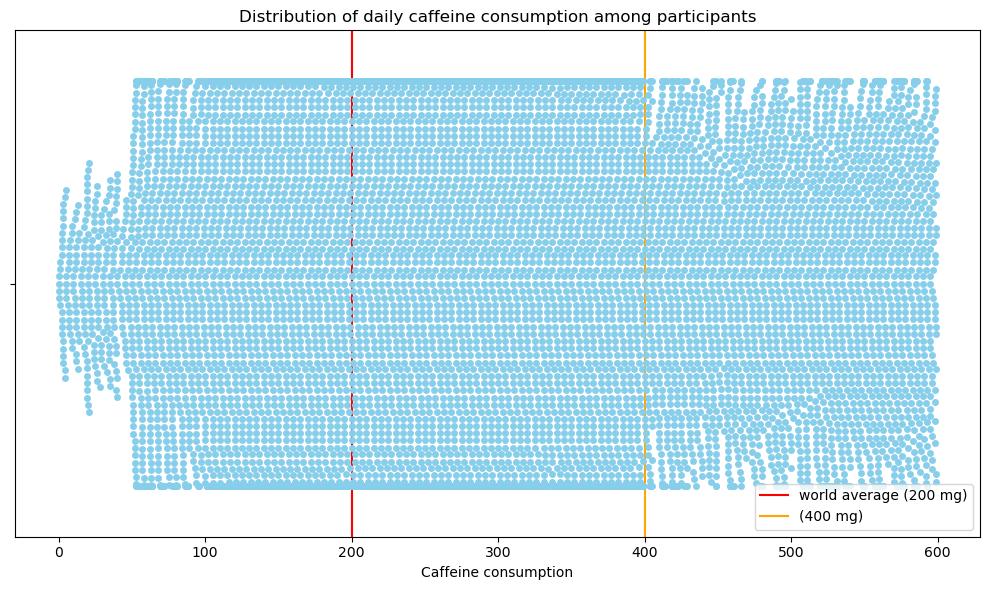

In [46]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x="Caffeine Intake (mg/day)", color="skyblue")
plt.axvline(x=200, color='red', linestyle='-', label='world average (200 mg)')
plt.axvline(x=400, color='orange', linestyle='-', label='(400 mg)')
plt.title("Distribution of daily caffeine consumption among participants")
plt.xlabel("Caffeine consumption")
plt.legend()
plt.tight_layout()
plt.show()

<div dir="rtl" style="text-align: right; border: 1px solid #ccc; padding: 15px; background-color: #f0f0f0; border-radius: 8px;">

## תובנה ראשונה:
</div>

<div dir="rtl" style="text-align: right; border: 1px solid #ccc; padding: 15px; background-color: #f0f0f0; border-radius: 8px;">

#### רמת חרדה וצריכת קפאין
</div>

<div dir="rtl" style="text-align: right; border: 1px solid #ccc; padding: 15px; background-color: #f0f0f0; border-radius: 8px;">
<div dir="rtl">
ככל שצריכת הקפה גבוהה יותר, רמת החרדה גבוהה יותר מגיל 18-50 רואים מאוד את ההשפעה, השפעת הקפאין עבור גילאי 50 ומעלה לא משפיע על רמת החרדה. ( אולי בגלל הרגל הקפאין )\
 צריכת קפאין גבוהה (ההמלצה המקסימלית של משרד הבריאות) -400 מ"ג\
 צריכת קפאין מאוד גבוהה -650 מ"ג

</div>

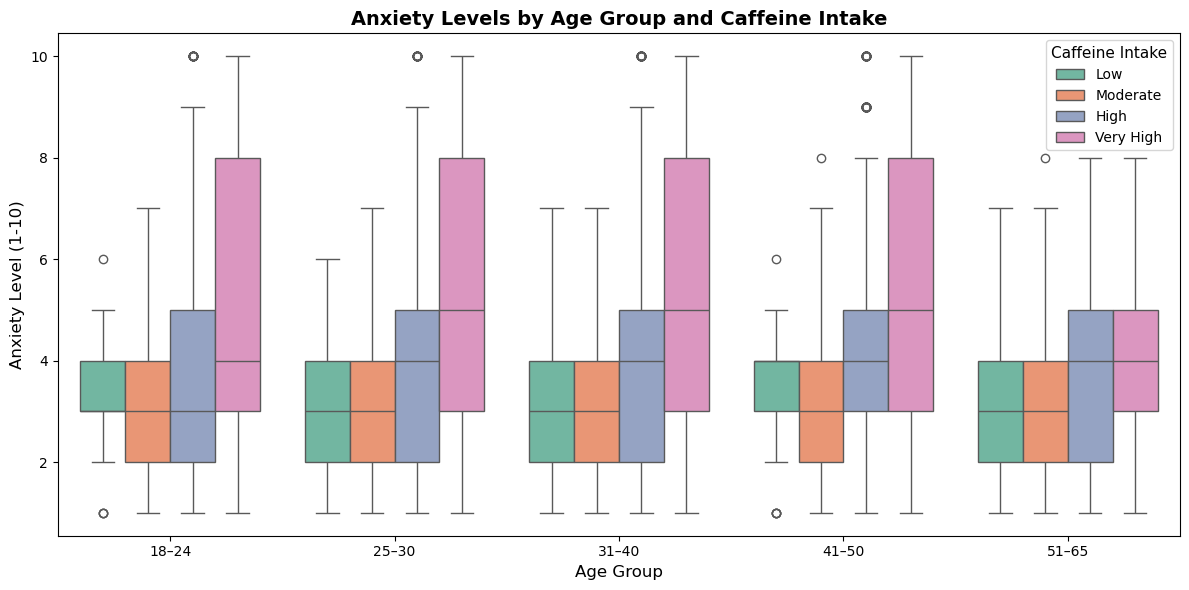

Caffeine Group
High         5172
Moderate     3184
Very High    2377
Low           263
Name: count, dtype: int64

In [50]:
df["age_bins"] = pd.cut(df["Age"], 
                        bins=[17, 24, 30, 40, 50, 65], 
                        labels=["18–24", "25–30", "31–40", "41–50", "51–65"])
df["Caffeine Group"] = pd.cut(df["Caffeine Intake (mg/day)"],
                              bins=[0, 50, 200, 400, 650],
                              labels=["Low", "Moderate", "High","Very High"])
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, 
            x="age_bins", 
            y="Anxiety Level (1-10)", 
            hue="Caffeine Group", 
            palette="Set2")  # אפשר גם pastel, Set3, muted
plt.title("Anxiety Levels by Age Group and Caffeine Intake", fontsize=14, fontweight="bold")
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Anxiety Level (1-10)", fontsize=12)
plt.legend(title="Caffeine Intake", title_fontsize=11, fontsize=10, loc="upper right")
plt.tight_layout()
plt.show()
df["Caffeine Group"].value_counts()

<div dir="rtl" style="text-align: right; border: 1px solid #ccc; padding: 15px; background-color: #f0f0f0; border-radius: 8px;">

#### רמת חרדה ושינה

</div>

<div dir="rtl" style="text-align: right; border: 1px solid #ccc; padding: 15px; background-color: #f0f0f0; border-radius: 8px;">

 ###### אפשר לראות בגרף שככל שישנים פחות ככה רמת החרדה עולה  
</div>

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7872\2836022944.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Sleep Group", y="Anxiety Level (1-10)", palette="Set2")


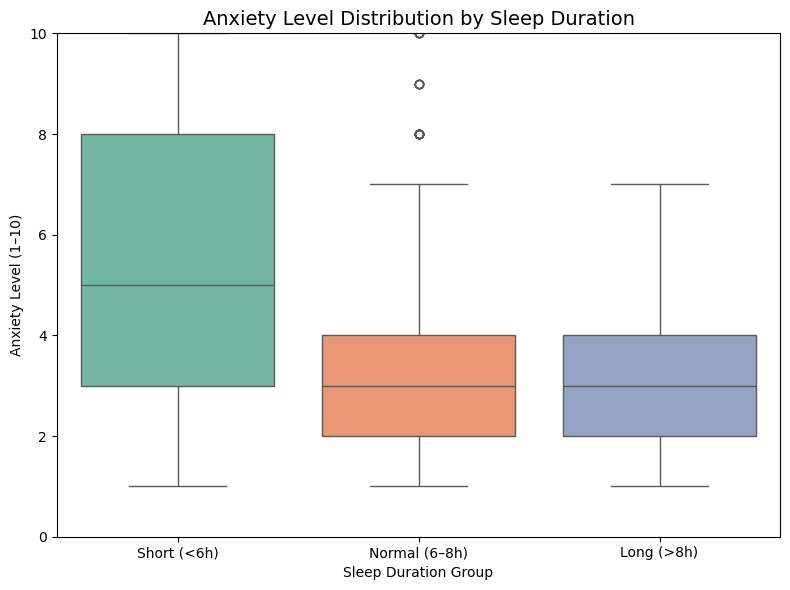

In [53]:
df["Sleep Group"] = pd.cut(
    df["Sleep Hours"],
    bins=[0, 5.9, 8, 24],
    labels=["Short (<6h)", "Normal (6–8h)", "Long (>8h)"])
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Sleep Group", y="Anxiety Level (1-10)", palette="Set2")
plt.title("Anxiety Level Distribution by Sleep Duration", fontsize=14)
plt.xlabel("Sleep Duration Group")
plt.ylabel("Anxiety Level (1–10)")
plt.ylim(0, 10)
plt.tight_layout()
plt.show()

<div dir="rtl" style="text-align: right; border: 1px solid #ccc; padding: 15px; background-color: #f0f0f0; border-radius: 8px;">

## תובנה שנייה:
</div>

<div dir="rtl" style="text-align: right; border: 1px solid #ccc; padding: 15px; background-color: #f0f0f0; border-radius: 8px;">

### הקשר בין קפאין ושעות שינה 
</div>

<div dir="rtl" style="text-align: right; border: 1px solid #ccc; padding: 15px; background-color: #f0f0f0; border-radius: 8px;">

 ###### רואים בצורה חדה שמי שישן פחות מ- 6 שעות צורך יותר קפאין

</div>

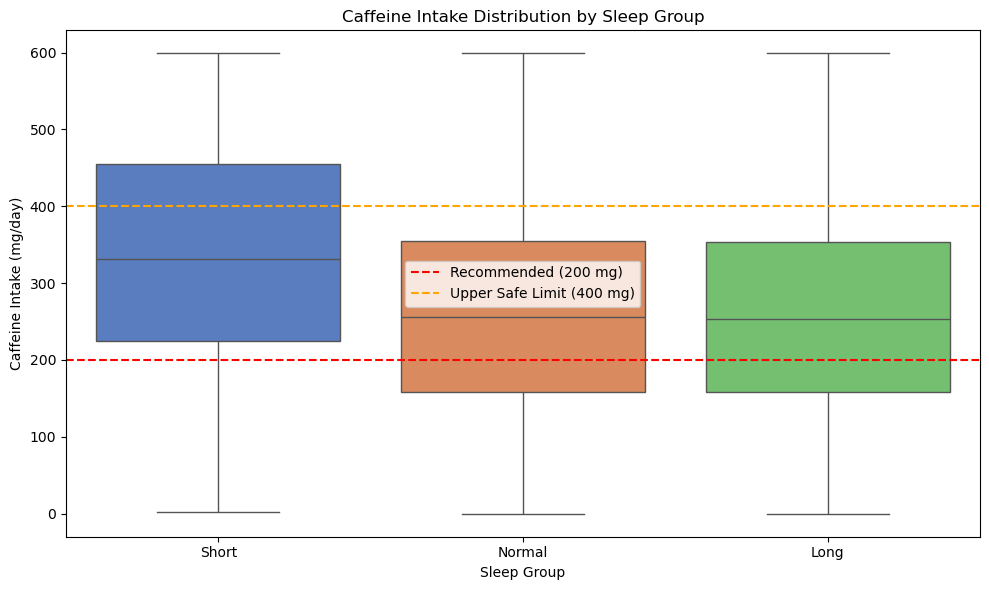

In [57]:
df["Sleep Group"] = pd.cut(
    df["Sleep Hours"],
    bins=[0, 5.9, 8, 24],
    labels=["Short", "Normal", "Long"])
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Sleep Group", y="Caffeine Intake (mg/day)", hue="Sleep Group", palette="muted")
plt.axhline(200, color='red', linestyle='--', label="Recommended (200 mg)")
plt.axhline(400, color='orange', linestyle='--', label="Upper Safe Limit (400 mg)")
plt.title("Caffeine Intake Distribution by Sleep Group")
plt.ylabel("Caffeine Intake (mg/day)")
plt.legend()
plt.tight_layout()
plt.show()

<div dir="rtl">
רואים שבקבוצת השינה הקצרה צריכת הקפאין בממוצע היא מעל הצריכה היומית הממוצעת והחציון העליון עובר את הצריכה המקסימלית המומלצת \
קבוצות שינה נורמלית וארוכה- הממוצע הוא מעל 250 מ"ג\
נבחן בגרפים הבאים לעומק את הדברים.
 
<div dir="rtl">
קבוצת שינה קצרה- פחות מ-6 שעות \
קבוצת שינה נורמלית - בין 6-8 שעות שינה \
קבוצת שינה ארוכה - יותר מ-8 שעות שינה
<div dir="rtl">
🔴 קו אדום ב־200 מ"ג: זו הצריכה היומית הממוצעת בעולם (לפי מחקרים).
<div dir="rtl">
🟠 קו כתום ב־400 מ"ג: זו הצריכה המקסימלית המומלצת למבוגרים לפי ארגוני בריאות.
<div dir="rtl">

<div dir="rtl" style="text-align: right; border: 1px solid #ccc; padding: 15px; background-color: #f0f0f0; border-radius: 8px;">

## תובנה שלישית:
</div>

<div dir="rtl" style="text-align: right; border: 1px solid #ccc; padding: 15px; background-color: #f0f0f0; border-radius: 8px;">

#### השילוב בין קפאין ושעות שינה בקבוצות גיל שונות
</div>

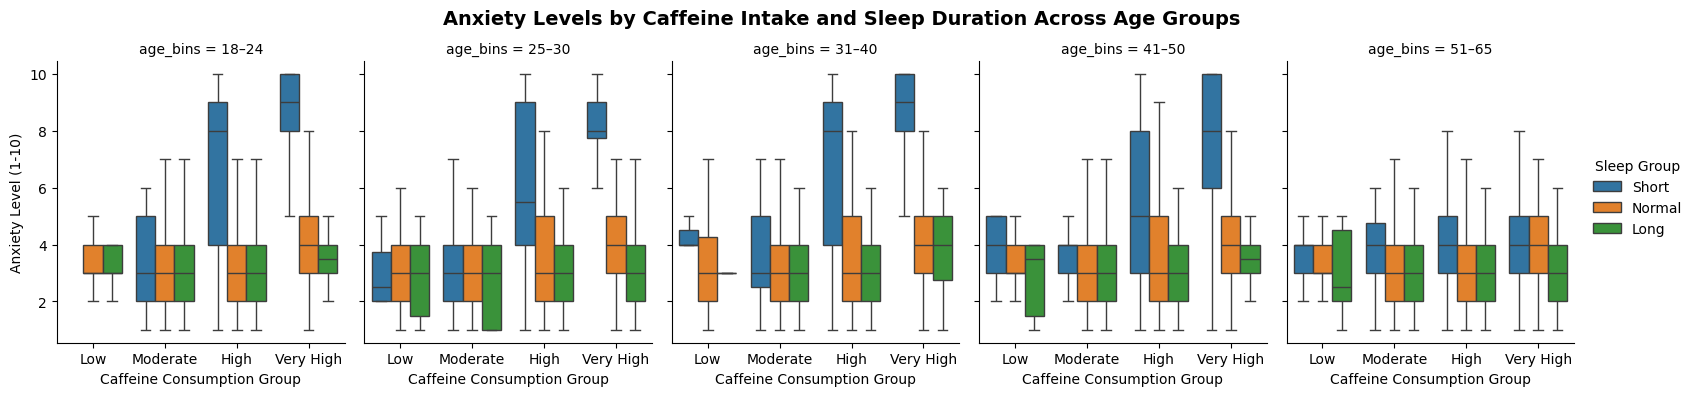

In [61]:
df["Caffeine Group"] = pd.cut(
    df["Caffeine Intake (mg/day)"],
    bins=[0, 50, 200, 400, np.inf],
    labels=["Low", "Moderate", "High", "Very High"])
df["Caffeine Group"] = pd.Categorical(
    df["Caffeine Group"],
    categories=["Low", "Moderate", "High", "Very High"],
    ordered=True)
df["Caffeine Group"] = pd.cut(df["Caffeine Intake (mg/day)"],
                              bins=[0, 50, 200, 450, 650],
                              labels=["Low", "Moderate", "High","Very High"])
df["Sleep Group"] = pd.cut(
    df["Sleep Hours"],
    bins=[0, 5.9, 8, 24],
    labels=["Short", "Normal", "Long"])
sleep_palette = {
    "Short": "#1f77b4",   
    "Normal": "#ff7f0e",  
    "Long": "#2ca02c"}  
g = sns.catplot(
    data=df,
    x="Caffeine Group",
    y="Anxiety Level (1-10)",
    hue="Sleep Group",
    col="age_bins",
    kind="box",
    palette=sleep_palette,
    showfliers=False,   
    sharey=True,        
    height=4,
    aspect=0.8)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Anxiety Levels by Caffeine Intake and Sleep Duration Across Age Groups", fontsize=14, fontweight='bold')
for ax in g.axes.flatten():
    ax.set_xlabel("Caffeine Consumption Group")
    ax.set_ylabel("Anxiety Level (1-10)")


<div dir="rtl" style="text-align: right; border: 1px solid #ccc; padding: 15px; background-color: #f0f0f0; border-radius: 8px;">

# מסקנה שנייה:
</div>

<div dir="rtl" style="text-align: right; border: 1px solid #ccc; padding: 15px; background-color: #f0f0f0; border-radius: 8px;">

<div dir="rtl">
 שילוב של שינה קצרה וצריכת קפאין גבוהה קשור
לרמות חרדה גבוהות משמעותית.
בקבוצות גיל מבוגרות יותר הקשר הזה נחלש וייתכן שיש מנגנוני ויסות טובים יותר או הרגלים יציבים יותר.
</div>

<div dir="rtl" style="text-align: right; border: 1px solid #ccc; padding: 15px; background-color: #f0f0f0; border-radius: 8px;">

# 📌  מאחורי המילים: כיצד משתנים אישיים משפיעים על הצלחת טיפול פסיכולוגי?

</div>

<div dir="rtl">
 כיצד גורמים כמו גיל, תזונה והרקע המשפחתי מעצבים את הדרך שבה אנחנו חווים חרדה – ואת הדרך בה אנחנו מתמודדים איתה?
</div>

<div dir="rtl">
כיצד גורמים חיצוניים כמו גיל, איכות תזונה והיסטוריה משפחתית של חרדה משפיעים על רמות החרדה בקרב אנשים הפונים לטיפול פסיכולוגי בלבד?
</div>

<div dir="rtl">

### נבחן תחילה, כמה אנשים מהמדגם פונים לפסיכולוג?

</div>

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px

df = pd.read_csv("enhanced_anxiety.csv")

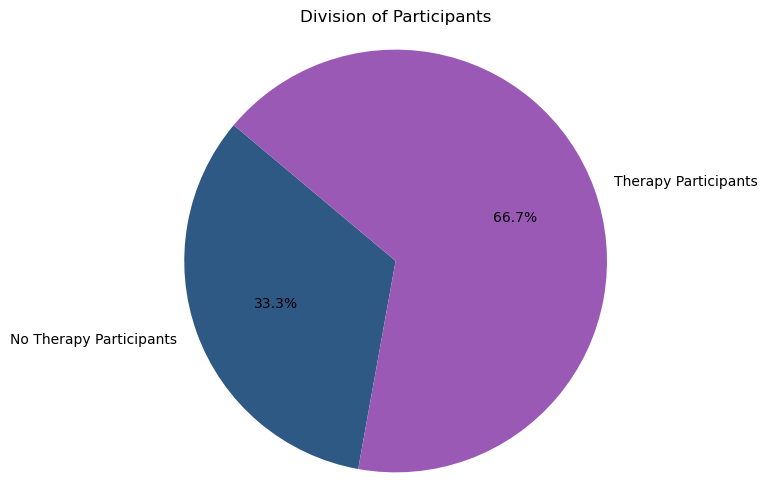

In [68]:
therapy_only_participants = df[
    (df['Medication'] == 'No') &
    (df['Therapy Sessions (per month)'] > 0) &
    (df['Therapy Sessions (per month)'] < 10)
].copy()

no_therapy_participants = df[df['Therapy Sessions (per month)'] == 0].copy()

labels = ['No Therapy Participants', 'Therapy Participants']
sizes = [len(no_therapy_participants), len(therapy_only_participants)]

colors = ['#2E5984', '#9B59B6']  

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Division of Participants')
plt.axis('equal')
plt.show()


<div dir="rtl">
מהנתונים עולה כי כ-66%, שני שליש מהנבדקים פונים לטיפול פסיכולוגי מתוך המדגם.

</div>



<div dir="rtl">
כעת נבחן את הקשר בין רמת החרדה לאותם אנשים אשר מטופלים אצל פסיכולוג
</div>


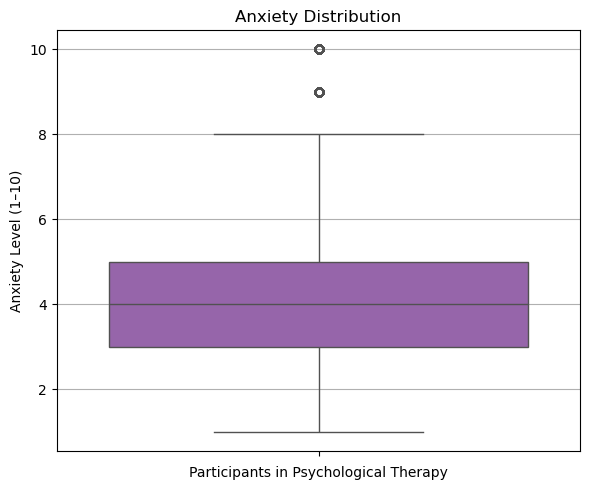

In [71]:
plt.figure(figsize=(6, 5))
sns.boxplot(
    data=therapy_only_participants,
    y="Anxiety Level (1-10)",
    color="#9B59B6")
plt.xlabel("Participants in Psychological Therapy")
plt.ylabel("Anxiety Level (1–10)")
plt.title("Anxiety Distribution", fontsize=12)
plt.grid(True, axis="y")
plt.tight_layout()
plt.show()

<div dir="rtl">
רמות החרדה בקרב מטופלים הפונים לטיפול פסיכולוגי מציגות פיזור רחב ונוכחות ערכים קיצוניים, כפי שניתן לראות מהאורך של התיבה והקווים ומהנקודות החריגות בגרף — מה שמעיד על שונות גבוהה בתגובת המטופלים.
</div>




<div dir="rtl">
השונות בתגובת המטופלים לטיפול עשויה להיות קשורה גם לתדירות המפגשים.
נבדוק זאת כאן 
</div>


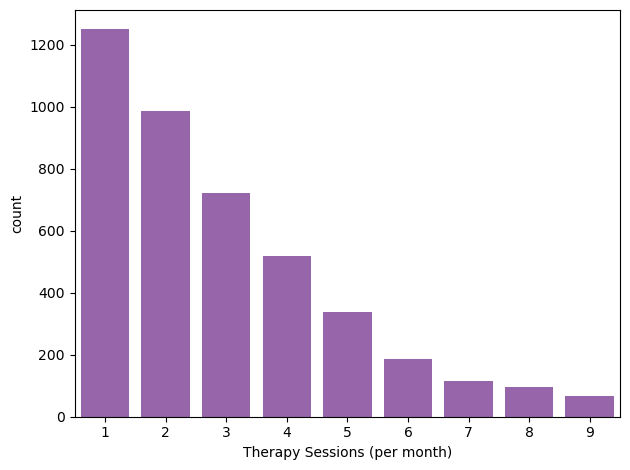

In [74]:
sns.countplot(data=therapy_only_participants,
              x='Therapy Sessions (per month)', color='#9B59B6')
plt.tight_layout()
plt.show()

<div dir="rtl">
ההתפלגות מצביעה על כך שרוב המטופלים פונים לטיפול בתדירות של אחת עד חמש פגישות בחודש, בעוד שקבוצות נוספות בוחרות בתדירויות גבוהות יותר – מה שמעיד על
שונות בעומק ובאינטנסיביות של התהליך הטיפולי
</div>


<div dir="rtl">
וכעת נבחן כיצד באות לידי ביטוי רמות החרדה בקרב מטופלים שמגיעים לטיפול פסיכולוגי בקצבים שונים
</div>

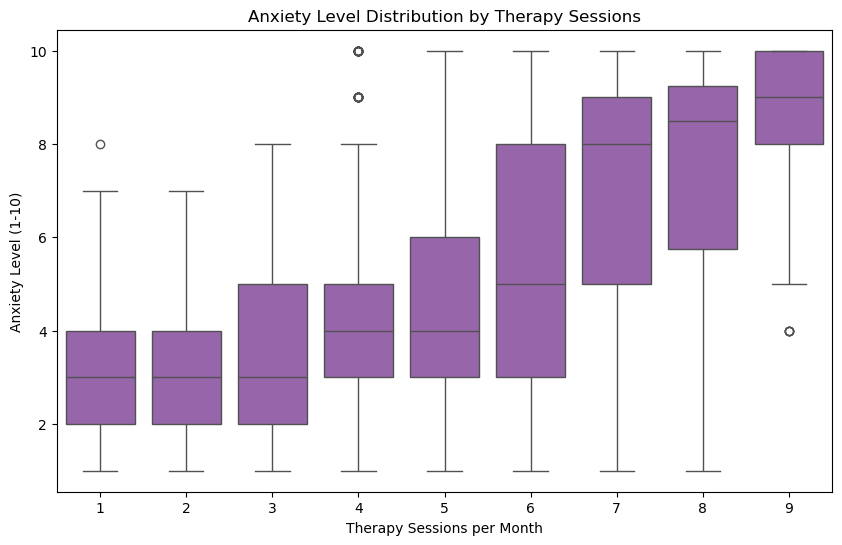

In [77]:
therapy_no_med = df[(df['Therapy Sessions (per month)'] > 0) & (df['Medication'] == 'No')]
therapy_no_med = therapy_no_med[therapy_no_med['Therapy Sessions (per month)'] < 10]
therapy_no_med = therapy_no_med.copy()
plt.figure(figsize=(10, 6))
sns.boxplot(data=therapy_no_med,
            x='Therapy Sessions (per month)',
            y='Anxiety Level (1-10)',
            color='#9B59B6')
plt.title('Anxiety Level Distribution by Therapy Sessions')
plt.xlabel('Therapy Sessions per Month')
plt.ylabel('Anxiety Level (1-10)')
plt.show()

<div dir="rtl">

### תובנה ראשונה:

</div>

<div dir="rtl">
ניתן לראות שקיים קשר בין רמת חרדה גבוהה לבין כמות טיפולים פסיכולוגיים גבוהה
</div>


<div dir="rtl">
לאחר שראינו כי קיימת התאמה בין רמות חרדה גבוהות לבין תדירות גבוהה של טיפול פסיכולוגי, נבקש כעת לבחון כיצד מאפיינים חיצוניים נוספים באים לידי ביטוי בהקשר של רמות החרדה בקרב מטופלים אלה.
</div>


<div dir="rtl">
    
### כיצד מתפלגים הגילאים בקבוצה זו?
    
</div>


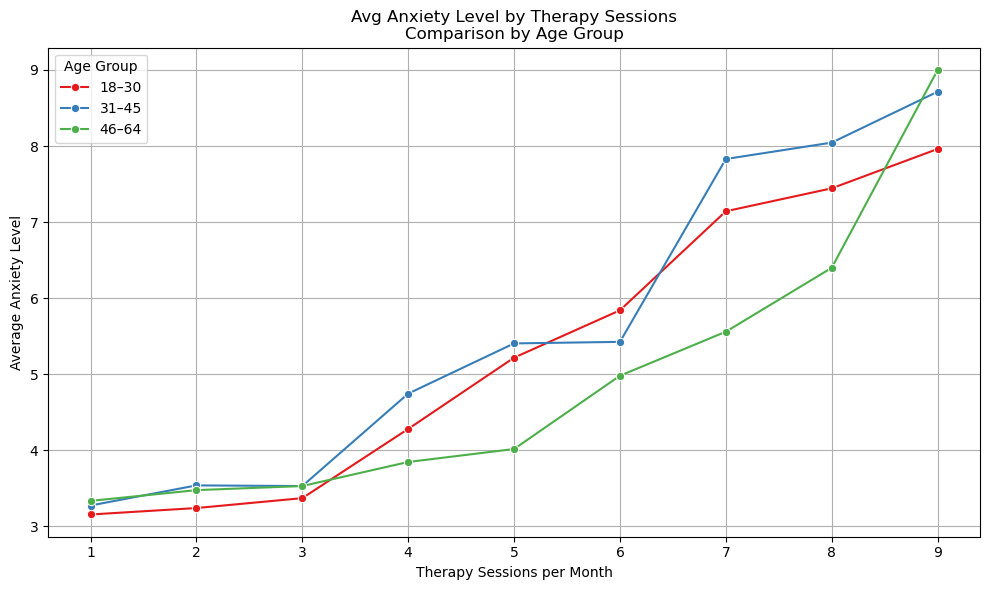

In [81]:
age_bins = [17, 30, 45, 65]
age_labels = ['18–30', '31–45', '46–64']
therapy_no_med['Age Group'] = pd.cut(therapy_no_med['Age'], bins=age_bins, labels=age_labels)
grouped = therapy_no_med.groupby(['Therapy Sessions (per month)', 'Age Group'], observed=False)['Anxiety Level (1-10)'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=grouped,
    x='Therapy Sessions (per month)',
    y='Anxiety Level (1-10)',
    hue='Age Group',
    marker='o',
    palette='Set1',
    err_style='band',)
plt.title('Avg Anxiety Level by Therapy Sessions\nComparison by Age Group')
plt.xlabel('Therapy Sessions per Month')
plt.ylabel('Average Anxiety Level')
plt.legend(title='Age Group')
plt.grid(True)
plt.tight_layout()
plt.show()

<div dir="rtl">

### וכאן אנו מעמיקים את התבונה הראשונה שלנו:

</div>


<div dir="rtl" style="text-align: right; border: 1px solid #ddd; padding: 15px; background-color: #f9f9f9; border-radius: 8px;"> 
<strong> קבוצת הגיל 64–46, המתפלגת לפי כמות הטיפולים, מעידה על רמות חרדה נמוכות יותר לעומת קבוצות צעירות יותר (גילאים 18-30, ו - 31-45).</strong><br>
הסבר אפשרי לכך טמון בכך שעם הגיל מצטברות גם מיומנויות טבעיות לוויסות רגשי – בין אם מתוך ניסיון חיים, התמודדות עם מצבי לחץ לאורך השנים, או הסתגלות למצבים משתנים. ייתכן שבני קבוצת גיל זו מגיעים לטיפול עם יכולות התמודדות בסיסיות שמפחיתות את עוצמת התגובה הטיפולית הראשונית.

</div>



<div dir="rtl">
לצד הגורמים החיצוניים, נרצה לבחון גם את השפעתם של הגורמים פסיכולוגיים על רמות החרדה בקרב המטופלים.
</div>
<div dir="rtl">
נמצאה השפעה מעניינת בקרב אלו אשר דיווחו על היסטוריה משפחתית של חרדה

</div>


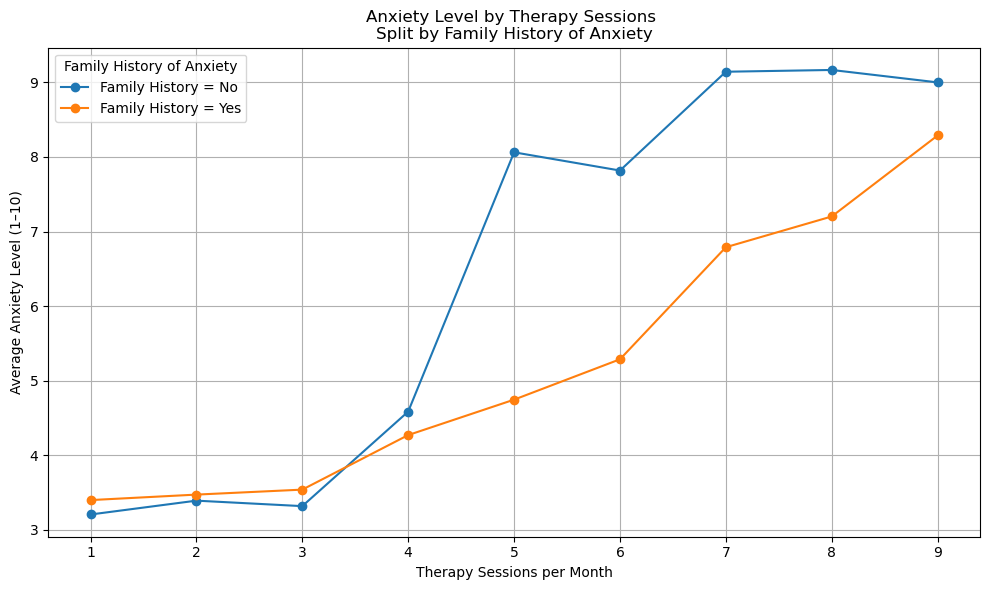

In [84]:
grouped = therapy_no_med.groupby(
    ['Therapy Sessions (per month)', 'Family History of Anxiety']
)['Anxiety Level (1-10)'].mean().reset_index()
pivoted = grouped.pivot(
    index='Therapy Sessions (per month)',
    columns='Family History of Anxiety',
    values='Anxiety Level (1-10)')
plt.figure(figsize=(10, 6))
for col in pivoted.columns:
    plt.plot(pivoted.index, pivoted[col], marker='o', label=f'Family History = {col}')
plt.title('Anxiety Level by Therapy Sessions \nSplit by Family History of Anxiety')
plt.xlabel('Therapy Sessions per Month')
plt.ylabel('Average Anxiety Level (1–10)')
plt.legend(title='Family History of Anxiety')
plt.grid(True)
plt.tight_layout()
plt.show()

<div dir="rtl">

### וכאן ניתן לבחון מאפיין נוסף, פסיכולוגי, שעלול לתרום להבנה עמוקה יותר של טיפול זה

</div>


<div dir="rtl" style="text-align: right; border: 1px solid #ddd; padding: 15px; background-color: #f9f9f9; border-radius: 8px;">
<strong>היסטורית חרדה במשפחה - מכשיר הסתגלות?</strong><br>
מטופלים ללא היסטורית חרדה במשפחה עלולים להיות פחות מודעים למושגים של ויסות רגשי ולהגיב בחרדה מוגברת.<br>
לכן, חשוב להעניק להם הכנה מותאמת וליווי רגשי הדוק בתחילת הדרך.
</div>


<div dir="rtl">
לאחר שבחנו כיצד רמות החרדה משתנות לפי גיל והיסטוריה משפחתית, 
</div>
<div dir="rtl">
נרצה כעת לבדוק האם גם הרגלים בריאותיים משפיעים על רמות החרדה בקרב מטופלים בטיפול פסיכולוגי

</div>

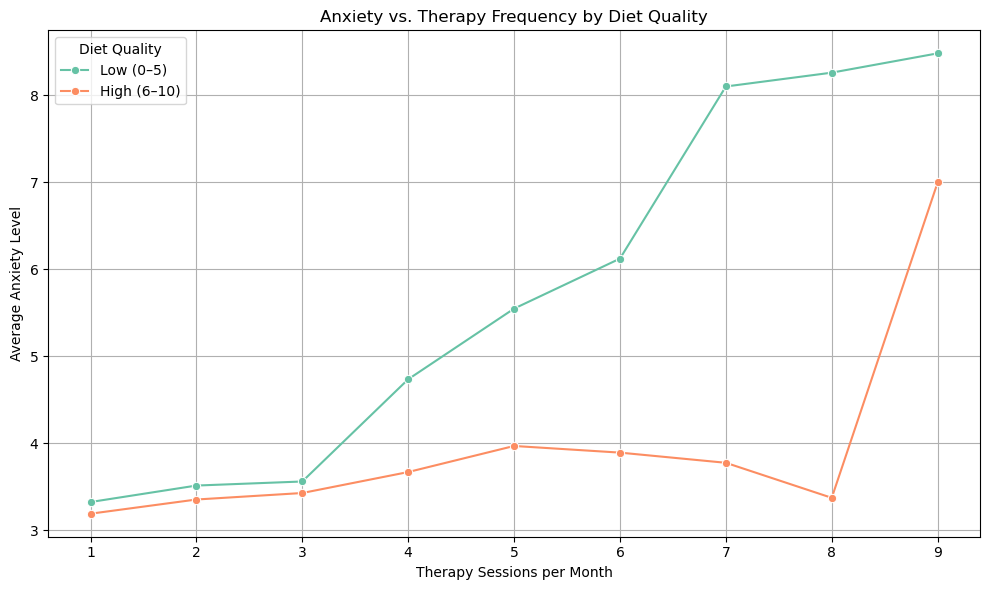

In [87]:
# Re-categorize diet quality into two bins: 0–5 and 5–10
therapy_only_participants["diet_quality_category"] = pd.cut(
    therapy_only_participants["Diet Quality (1-10)"],
    bins=[0, 5, 10],
    labels=["Low (0–5)", "High (6–10)"]
)

# Group data
line_data = therapy_only_participants.groupby(
    ["Therapy Sessions (per month)", "diet_quality_category"],
    observed=False
)["Anxiety Level (1-10)"].mean().reset_index()

# Filter for therapy sessions up to 9 per month
line_data_filtered = line_data[line_data["Therapy Sessions (per month)"] <= 9]

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=line_data_filtered,
    x="Therapy Sessions (per month)",
    y="Anxiety Level (1-10)",
    hue="diet_quality_category",
    palette="Set2",
    marker="o"
)

plt.xlabel("Therapy Sessions per Month")
plt.ylabel("Average Anxiety Level")
plt.title("Anxiety vs. Therapy Frequency by Diet Quality")
plt.legend(title="Diet Quality")
plt.grid(True)
plt.tight_layout()
plt.show()


<div dir="rtl">

### ושכבה נוספת: 

</div>

<div dir="rtl" style="text-align: right; border: 1px solid #ddd; padding: 15px; background-color: #f9f9f9; border-radius: 8px;">
הגרף מצביע על כך שקבוצות מטופלים בעלי תזונה איכותית יותר (6–10) שומרים על רמות חרדה נמוכות יחסית גם בקרב מטופלים אשר פונים ליותר טיפולים פסיכולוגיים, בעוד שאצל מטופלים בעלי תזונה ירודה יותר (0–5) ניכרת חרדה גבוהה יותר כמעט אצל כל קבוצות המטופלים. ממצא זה מחזק את ההבנה שאיכות התזונה עשויה להיות קשורה לרמות חרדה נמוכות יותר בקרב מטופלים בטיפול פסיכולוגי, במיוחד בתדירויות טיפול גבוהות.
</div>


<div dir="rtl">

### אז לאחר ניתוח מגוון גורמים חיצוניים ופסיכולוגיים בקרב מטופלים בטיפול פסיכולוגי, ניתן לזהות מספר תובנות מרכזיות שמשקפות כיצד משתנים אלו מתקשרים לרמות החרדה🔍🧑‍⚕️: 

</div>

<div dir="rtl" style="text-align: right; border: 1px solid #ddd; padding: 15px; background-color: #f9f9f9; border-radius: 8px;">
<div dir="rtl">
• הגיל אכן משפיע! מצאנו שקבוצת המטופלים בגילאי 46–64 העידו על רמות חרדה נמוכות יותר .
</div>
    
<div dir="rtl">
• מטופלים ללא היסטוריה משפחתית של חרדה העידו על רמות חרדה גבוהות יותר — ייתכן בשל חוסר בוויסות רגשי.
</div>

<div dir="rtl">
• בתחום אורח החיים, נמצא קשר ברור בין תזונה איכותית לבין רמות חרדה נמוכות .
</div>

<div dir="rtl">
לסיכום,  
הנתונים מצביעים על מה שהשיח הטיפולי יודע כבר מזמן: לא מדובר רק בחרדה, אלא במי שחווה אותה. גיל, תזונה, והיסטוריה רגשית – כולם מצטרפים לתמונה שמסבירה לא רק כמה חרדה יש, אלא למה היא מתבטאת כפי שהיא. טיפול פסיכולוגי אפקטיבי אינו רק תגובה לתסמין, אלא מענה להקשר שבו הוא נוצר.
</div>
</div>
